# Integrated Project 2 : Zyfra - Au Concentrate Prediction

## Introduction

This project focuses on developing a prototype machine learning model for the company Zyfra. Zyfra is a company engaged in developing effective solutions for large-scale industries, such as the mining industry. This machine learning model is expected to be able to predict the AU concentrate based on the data from the extraction and cleaning processes of the concentrate.

### Goal

This project focuses on developing a prototype machine learning model for the company Zyfra. Zyfra is a company engaged in developing effective solutions for large-scale industries, such as the mining industry. This machine learning model is expected to be able to predict the AU concentrate based on the data from the extraction and cleaning processes of the concentrate.

### Steps

Concentrate extraction and cleaning process data are stored in the filepaths: `datasets/gold_recovery_train.csv`, `datasets/gold_recovery_test.csv`, `datasets/gold_recovery_full.csv`.

To perform model training and development, we will use the sMAPE evaluation metric, where there are several general stages, including:
1. **Data preparation** - at this stage, a dataset will be prepared, which will then be checked for the suitability of the `gold recovery` calculation using the training set based on the MAE score.

2. **Data exploration** - at this stage, we will explore the data set and analyze the data.

3. **Predictive Modeling** - at this stage, we will train and develop several regression models. To evaluate the models, we will use *cross validation* and sMAPE metrics. The best model will be selected to predict the Au concentration in the test dataset.

### Overview

**1. Introduction**
- Objective
- Stages
- Overview

**2. Data Preparation**
- Initialization
- Loading Dataset
- Gold Calculation Check
- Feature Analysis of `data_test` dataset

**3. Exploration Data**
- Metal Concentration Change
- Particle Size Distribution
- Substance Concentration at Each Stage

**4. Model Building**
- Data Pre-Processing
- Model Selection
- Model Testing

**5. General Conclusion**

## Data Preparation

### Initialization

To perform data preparation and data exploration, we will first load the necessary libraries:
1. `Pandas` Library
2. `Matplotlib` Library
3. `Seaborn` Library
4. `NumPy` Library

In [1]:
# import pandas libraries
import pandas as pd

# import matplotlib libraries
from matplotlib import pyplot as plt

# import seaborn libraries
import seaborn as sns

# import numpy libraries
import numpy as np

### Loading Dataset

Concentrate extraction and cleaning process data stored in the filepath:
- `datasets/gold_recovery_train.csv` will be stored in the variable `data_train`. 
- `datasets/gold_recovery_test.csv` will be stored in variable `data_test` 
- `datasets/gold_recovery_full.csv` will be stored in variable `data_full` 

In [2]:
# loading the dataset
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

**Data_train**

In [3]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


**Data_test**

In [6]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
data_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

**Data_full**

In [9]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [11]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


***
Based on the information above, it is known that:
1. There are 87 columns in the `data_train` and `data_full` datasets, but in the `data_test` dataset, there are only 57 columns, which indicates that there are some missing parameters or features in the test dataset. This finding will be checked further.
2. There is a difference in the number of non_null and rangeindex in some columns in each dataset, which indicates the possibility of missing values in these columns. To make sure, we will check it with **.isna()** function.
3. There are 2 data types in each dataset, namely `object` and `float`, where all parameters and features are only of type `float` so this data is quite ready for model training.
4. The date column contains data information and the date of parameter value collection, which is done every hour.

### Gold Calculation Check

At this stage, we will check the calculation of `recovery` gold using the `data_train` dataset against the `rougher.output.recovery` column and calculate the **MAE** score. Based on the project description, the data to be used for `recovery` calculation are `rougher.input.feed_au`, `rougher.output.tail_au`, `rougher.output.concentrate_au` data.

In [12]:
# make copy dataset from data_train
data_check = data_train.copy()

In [13]:
# make numerator and denumerator for recovery calculation
data_check['numerator'] = data_check['rougher.output.concentrate_au'] * (data_check['rougher.input.feed_au'] - data_check['rougher.output.tail_au'])
data_check['denumerator'] = data_check['rougher.input.feed_au'] * (data_check['rougher.output.concentrate_au'] - data_check['rougher.output.tail_au'])

In [14]:
# checking missing values on parameter to calculate recovery
data_check[['rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.concentrate_au']].isna().sum()

rougher.input.feed_au              83
rougher.output.tail_au           2249
rougher.output.concentrate_au      82
dtype: int64

Based on the results above, there are some missing values in each column. To overcome this and prevent errors in the calculation, the missing values will be replaced with the value `0` in the numerator and the value `1` in the denumerator.

In [15]:
# handle missing values
data_check['numerator'] = data_check['numerator'].fillna(0)
data_check['denumerator'] = data_check['denumerator'].fillna(1)

In [16]:
# calculate recovery
data_check['recovery'] = data_check['numerator'] / data_check['denumerator'] * 100

In [17]:
# show MAE within recovery and rougher.output.recovery
mae = (data_check['recovery'] - data_check['rougher.output.recovery']).abs().mean()

print('MAE antara manual calculation and rougher.output.recovery =', mae)

MAE antara manual calculation and rougher.output.recovery = 9.303415616264301e-15


Based on the above results, it is known that the MAE score is **9.30e-15** which means it is very close to the value of `0`, so it can be concluded that **the gold recovery calculation is appropriate**.

### Feature Analysis of `data_test` dataset

At this stage, we will check for features that are not available in the `data_test` dataset and compare them with the `data_train` dataset.

In [18]:
# menampilkan kolom yang hilang pada dataset data_test
missing_columns = set(list(data_train.columns.values)) - set(list(data_test.columns.values))
missing_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [19]:
data_train[missing_columns].dtypes

rougher.output.tail_pb                                float64
rougher.output.concentrate_au                         float64
final.output.tail_pb                                  float64
rougher.output.tail_au                                float64
final.output.tail_au                                  float64
secondary_cleaner.output.tail_sol                     float64
primary_cleaner.output.concentrate_ag                 float64
final.output.concentrate_pb                           float64
final.output.tail_sol                                 float64
rougher.calculation.sulfate_to_au_concentrate         float64
primary_cleaner.output.tail_sol                       float64
primary_cleaner.output.tail_pb                        float64
secondary_cleaner.output.tail_au                      float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
rougher.calculation.au_pb_ratio                       float64
primary_cleaner.output.concentrate_pb                 float64
primary_

***
From the information above, it is known that:
1. Some parameters and features of the flotation and cleaning process are missing, including the labels `rougher.output.recovery` and `final.output.recovery`.
2. The missing columns are of the data type `float`.
3. The missing columns are likely because they are the results or outputs of the flotation and cleaning process stages, whose values will be obtained in real time as the process runs.

## Data Exploration

At this stage, we will analyze:
1. Changes in `Au/gold`, `Ag/silver`, and `Pb/lead` metal concentrations at each stage of the extraction and permeation process until the final concentrate is obtained in the `data_full` dataset.
2. Comparison of feed particle size distribution in `data_train` and `data_test` datasets.
3. Comparison of concentrations of all substances at each stage, from feeding, flotation, and cleaning to the final concentrate

### Metal Concentration Change

The first step is to list each stage and store it in the `sections` variable.

In [20]:
# menambil informasi kada konsentrat tiap tahapan
sections = ['rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}',]

In [21]:
# membuat fungsi progression untuk menampilkan perubahan kadar dalam grafik histogram
def progression(logam):
    section = [x.format(logam) for x in sections]
    for i in section:
        data_full[i].hist(alpha = 0.75, bins=25)
    plt.legend(section)
    plt.xlabel('Konsentrasi')

#### Au / Gold Metal

Text(0.5, 1.0, 'Perubahan Kadar Au')

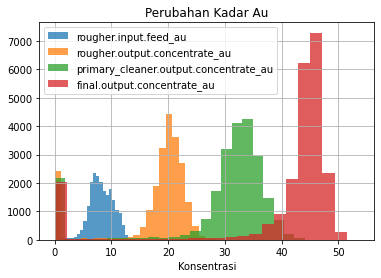

In [22]:
# menampilkna perubahan kadar logam Au di tiap tahapan
progression('au')
plt.title('Perubahan Kadar Au')

Based on the histogram graph above, it is known that the `Au/gold` content tends to increase at each stage, where the highest gold concentration is in the final cleaning, or `final.output.concentrate`.

#### Ag / Silver Metal 

Text(0.5, 1.0, 'Perubahan Kadar Ag')

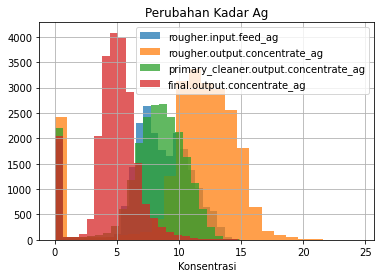

In [23]:
# menampilkna perubahan kadar logam Ag di tiap tahapan
progression('ag')
plt.title('Perubahan Kadar Ag')

Based on the histogram graph above, it is known that the change in `Ag/silver` concentration tends not to increase significantly compared to `Au/gold` concentration. Interestingly, there are cases where the `Ag/silver` concentration in the initial feed stage tends to be higher than the later stages, meaning that there is a potential for some `Ag/silver` concentration to be lost in the flotation and cleaning stages.

#### Pb / Lead Metal

Text(0.5, 1.0, 'Perubahan Kadar Pb')

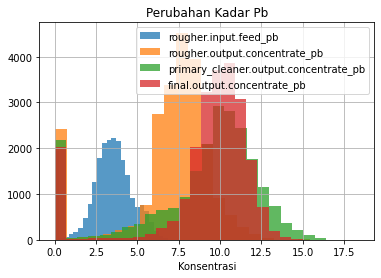

In [24]:
# menampilkna perubahan kadar logam Ag di tiap tahapan
progression('pb')
plt.title('Perubahan Kadar Pb')

Based on the graph above, it is known that the biggest change in `Pb/lead` concentration occurs at the flotation stage, where the `Pb/lead` concentration in the form of `rougher.concentrate` tends to be higher than `rougher.feed`, but the opposite happens at the cleaning and final product stages where there is almost no significant change in concentration after going through both stages.

### Particle Size Distribution

At this stage, we will analyze the feed particle size distribution in the `data_train` and `data_test` datasets. The particle size is stored in the `rougher.input.feed_size` column.

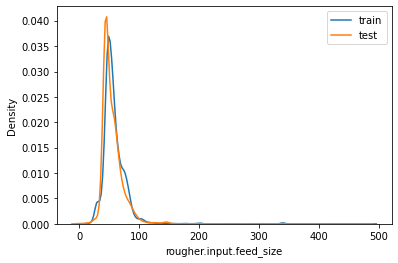

In [25]:
# menampilkan perbedaan ukuran partikel feed dataset data_train dan data_test
sns.kdeplot(data=data_train['rougher.input.feed_size'])
sns.kdeplot(data=data_test['rougher.input.feed_size'])
plt.legend(['train', 'test'])

Based on the graph above, it can be concluded that the particle size distribution in the `data-train` dataset is almost similar to that of `data_test`.

### Substance Concentration at Each Stage

At this stage, the total concentration of all substances in the feed, the coarser concentration, and the final concentrate concentration will be checked with the help of histogram graphs.

**Feed**

Text(0.5, 0, 'Konsentrasi')

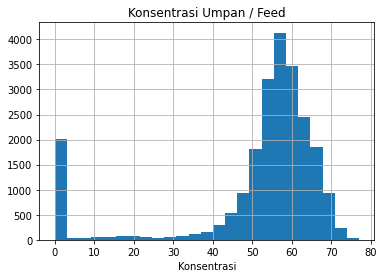

In [26]:
# menyimpan informasi konsentrasi substansi umpan / feed awal dalam list feeds
feeds = ['rougher.input.feed_ag',
         'rougher.input.feed_pb',
         'rougher.input.feed_sol',
         'rougher.input.feed_au' ]

# menampilkan grafik histogram
data_full[feeds].sum(1).hist(bins=25)
plt.title('Konsentrasi Umpan / Feed')
plt.xlabel('Konsentrasi')

Based on the above graph, there are about `600` data with `0` concentration, which is an amomaly. Observations with substance concentration of `0` in the feed will be removed from the dataset.

**Rougher Concentrate**

Text(0.5, 0, 'Konsentrasi')

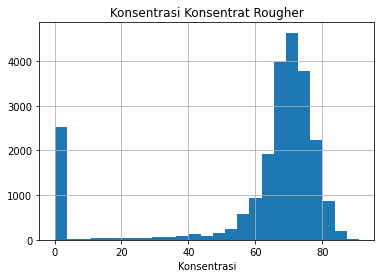

In [27]:
# menyimpan informasi konsentrasi substansi hasil flotasi
rougher = ['rougher.output.concentrate_ag',
           'rougher.output.concentrate_pb',
           'rougher.output.concentrate_sol',
           'rougher.output.concentrate_au']

# menampilkan grafik histogram
data_full[rougher].sum(1).hist(bins=25)
plt.title('Konsentrasi Konsentrat Rougher')
plt.xlabel('Konsentrasi')

Based on the graph above, there are about `2500` data points with a concentration of `0` which is an anomaly such as the feed concentration. Data with a value of `0` will be removed from the dataset.

**Final Concentrate**

Text(0.5, 0, 'Konsentrasi')

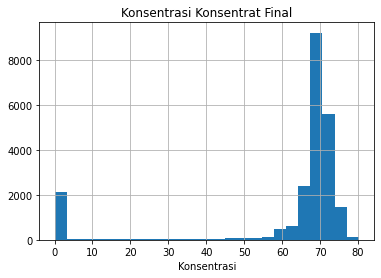

In [28]:
# menyimpan informasi konsentrasi substansi hasil akhir
finals = ['final.output.concentrate_ag',
         'final.output.concentrate_pb',
         'final.output.concentrate_sol',
         'final.output.concentrate_au']

# menampilkan grafik histogram
data_full[finals].sum(1).hist(bins=25)
plt.title('Konsentrasi Konsentrat Final')
plt.xlabel('Konsentrasi')

Based on the graph above, it is known that in the final result there are also `0` values around `2000` data; this anomaly will also be removed from the dataset.

**Anomalies Handling**

Based on the anomaly exploration above, the observations with a value of `0` in the substance concentration column at each stage will be removed from the dataset.

In [29]:
# menyeleksi observasi dengan konsentrasi substansi 0 pada dataset data_train
x=0
data_train = data_train[data_train[feeds].sum(1) > x]
data_train = data_train[data_train[rougher].sum(1) > x]
data_train = data_train[data_train[finals].sum(1) > x]

Since the `data_test` dataset does not contain all columns or stages, it will be selected based on the date of data collection from the `data_full` dataset.

In [30]:
# menyeleksi observasi dengan konsentrasi substansi 0 pada dataset data_test
data_full_test = data_full[data_full['date'].isin(data_test['date'])].reset_index(drop=True)
data_test = data_test[data_full_test[feeds].sum(1) > x]
data_test = data_test[data_full_test[rougher].sum(1) > x]
data_test = data_test[data_full_test[finals].sum(1) > x]

/tmp/ipykernel_26/2418852135.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test = data_test[data_full_test[rougher].sum(1) > x]
/tmp/ipykernel_26/2418852135.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test = data_test[data_full_test[finals].sum(1) > x]


## Building Model

### Data Pre-Processing

In accordance with the initial exploration results where there are potential missing values in the `data_train` and `data_test` datasets, the percentage will be reconfirmed. First, remove the `date` column from both datasets.

In [31]:
# menghilangkan kolom date
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

#### Handling Missing Values

**`Data_train`**

In [32]:
# menampilkan persentase data yang hilang
data_train.isna().mean().sort_values(ascending=False) * 100

secondary_cleaner.output.tail_sol    11.917064
rougher.output.recovery               8.035241
rougher.output.tail_ag                6.359300
rougher.output.tail_sol               6.352676
rougher.output.tail_au                6.352676
                                       ...    
rougher.input.feed_ag                 0.000000
secondary_cleaner.output.tail_au      0.000000
rougher.input.feed_au                 0.000000
rougher.output.concentrate_pb         0.000000
rougher.output.concentrate_ag         0.000000
Length: 86, dtype: float64

Based on the information above, the percentage of missing values is in the `secondary_cleaner.output.tail_sol` column, which reaches `11%`. To overcome the missing values, the `data_train` dataset will be filled with the median value of each column.

In [33]:
# mengisi nilai yang hilang dengan nilai median
for i in data_train:
    med_train = data_train[i].median()
    data_train[i] = data_train[i].fillna(med_train)

In [34]:
# menampilkan persentase data yang hilang
data_train.isna().mean().sort_values(ascending=False) * 100

final.output.concentrate_ag                   0.0
rougher.state.floatbank10_b_air               0.0
rougher.state.floatbank10_f_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_e_air               0.0
                                             ... 
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 86, dtype: float64

The missing values in the `data_train` dataset have been fixed.

**`Data_test`**

In [35]:
# mengambil informasi target dari dataset data_full
data_test[['rougher.output.recovery','final.output.recovery']] = data_full_test[['rougher.output.recovery','final.output.recovery']]

In [36]:
# menampilkan persentase data yang hilang
data_test.isna().mean().sort_values(ascending=False) * 100

rougher.output.recovery                       2.084123
rougher.input.floatbank11_xanthate            0.549451
final.output.recovery                         0.473664
rougher.input.feed_sol                        0.454718
secondary_cleaner.state.floatbank3_a_air      0.151573
rougher.input.feed_rate                       0.132626
rougher.input.floatbank10_sulfate             0.132626
primary_cleaner.input.depressant              0.075786
rougher.input.floatbank11_sulfate             0.075786
secondary_cleaner.state.floatbank2_a_air      0.056840
primary_cleaner.input.sulfate                 0.037893
primary_cleaner.input.xanthate                0.037893
secondary_cleaner.state.floatbank2_b_air      0.018947
rougher.input.feed_size                       0.018947
rougher.input.floatbank10_xanthate            0.018947
primary_cleaner.state.floatbank8_d_level      0.000000
secondary_cleaner.state.floatbank4_b_air      0.000000
secondary_cleaner.state.floatbank2_b_level    0.000000
secondary_

In [37]:
# mengisi nilai yang hilang dengan nilai median
for i in data_test:
    med_test = data_test[i].median()
    data_test[i] = data_test[i].fillna(med_test)

In [38]:
# menampilkan persentase data yang hilang
data_test.isna().mean().sort_values(ascending=False) * 100

primary_cleaner.input.sulfate                 0.0
secondary_cleaner.state.floatbank3_b_air      0.0
rougher.state.floatbank10_d_level             0.0
rougher.state.floatbank10_e_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_f_air               0.0
rougher.state.floatbank10_f_level             0.0
secondary_cleaner.state.floatbank2_a_air      0.0
secondary_cleaner.state.floatbank2_a_level    0.0
secondary_cleaner.state.floatbank2_b_air      0.0
secondary_cleaner.state.floatbank2_b_level    0.0
secondary_cleaner.state.floatbank3_a_air      0.0
secondary_cleaner.state.floatbank3_a_level    0.0
secondary_cleaner.state.floatbank3_b_level    0.0
primary_cleaner.input.depressant              0.0
secondary_cleaner.state.floatbank4_a_air      0.0
secondary_cleaner.state.floatbank4_a_level    0.0
secondary_cleaner.state.floatbank4_b_air      0.0
secondary_cleaner.state.floatbank4_b_level    0.0
secondary_cleaner.state.floatbank5_a_air      0.0


The missing values in the `data_test` dataset have been fixed.

#### Prepare Feature and Target 

Since there are some parameters in the `data_train` dataset that are not contained in `data_test`, the model development will use the features contained in `data_test`.

In [39]:
columns_used = data_test.columns.values.tolist()
data_train_new = data_train[columns_used]

In [40]:
# menyiapkan kolom target
target = ['rougher.output.recovery','final.output.recovery']

In [41]:
# menyiapkan feature dan target data_train
x_train = data_train_new.drop(target, axis = 1).reset_index(drop=True)
y_train = data_train_new[target].reset_index(drop=True)
y_train.columns = [0,1]

# menyiapkan feature dan target data_test
x_test = data_test.drop(target, axis = 1).reset_index(drop=True)
y_test = data_test[target].reset_index(drop=True)
y_test.columns = [0,1]

In [42]:
x_train.shape

(15096, 52)

In [43]:
x_test.shape

(5278, 52)

In [44]:
y_train.shape

(15096, 2)

In [45]:
y_test.shape

(5278, 2)

Features and targets in the training set and test set are used for model development.

### Model Selection

The model to be developed is a regression model:
1. Random Forest Regressor.
2. Linear Regression.
3. Decision Tree Regressor.

Model evaluation will be carried out through cross-validation by looking at the sMAPE metric. To develop the model, first create an sMAPE calculation function.

In [46]:
# fungsi kalkulasi sMAPE
def smape(y_actual, y_pred):
    numerator = (y_actual - y_pred).abs()
    denumerator = (y_actual.abs() + y_pred.abs()) / 2
    
    return (numerator / denumerator).mean() * 100

def smape_end(y_actual, y_pred):
    rougher = smape(y_actual[0], y_pred[0])
    final = smape(y_actual[1], y_pred[1])
    
    return 0.25 * rougher + 0.75 * final

The first step is to create a regressor model hyperparameter tunning function.

In [47]:
# membuat fungsi tunning hyperparameter dengan bantuan modul sklearn.model_selection untuk model Random Forest dan Linear Regression
from sklearn.model_selection import KFold

def score_model(model, cv = 5):
    score = []
    
    for subtrain_index, valid_index in KFold(n_splits=cv).split(x_train):
        
        x_subtrain = x_train.loc[subtrain_index].reset_index(drop = True)
        y_subtrain = y_train.loc[subtrain_index].reset_index(drop = True)
        
        x_valid = x_train.loc[valid_index].reset_index(drop = True)
        y_valid = y_train.loc[valid_index].reset_index(drop = True)
        
        model.fit(x_subtrain, y_subtrain)
        predict_valid = pd.DataFrame(model.predict(x_valid))
        
        score.append(smape_end(y_valid, predict_valid))
        
    return pd.Series(score).mean()

**1. Random Forest Regressor**

The first model developed is the Random Forest Regressor model. First import RandomForestRegressor from the sklearn.ensemble module.

In [48]:
# mengimport random forest regressor dari modul sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [49]:
# tunning hyperparameter model random forest
for depth in range(1,6):
    model_1 = RandomForestRegressor(max_depth= depth, n_estimators = 25, random_state=42)
    rf_score = round(score_model(model_1), 2)
    print('RF, depth = ', depth, 'sMAPE score = ', rf_score)

RF, depth =  1 sMAPE score =  10.08
RF, depth =  2 sMAPE score =  9.44
RF, depth =  3 sMAPE score =  9.42
RF, depth =  4 sMAPE score =  9.19
RF, depth =  5 sMAPE score =  9.2


Based on the results above, it is known that the lowest sMAPE score is at depth `depth=4` with a sMAPE score of `9.19`.

**2. Linear Regression**

The second model is the Linear Regression model. First, import it from the sklearn library linear_model module.

In [50]:
# mengimport linear regression dari modul sklearn.linear_model
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()
lr_score = round(score_model(model_2), 2)
print('sMAPE model Linear Regression = ', lr_score)

sMAPE model Linear Regression =  11.39


Based on the results above, it is known that the sMAPE of the Linear Regression model is `11.39`, a slightly larger value than the Random Forest model.

**3. Decision Tree Regressor**

The third model developed is the Decision Tree Regressor model. First, import this model from the sklearn.tree module.

In [54]:
# mengimport Decision tree regressor dari modul tree
from sklearn.tree import DecisionTreeRegressor

In [52]:
# tunning hyperparameter model random forest
for depth in range(1,6):
    model_3 = DecisionTreeRegressor(max_depth= depth, random_state=42)
    dt_score = round(score_model(model_3), 2)
    print('RF, depth = ', depth, 'sMAPE score = ', dt_score)

RF, depth =  1 sMAPE score =  10.18
RF, depth =  2 sMAPE score =  10.07
RF, depth =  3 sMAPE score =  9.88
RF, depth =  4 sMAPE score =  9.65
RF, depth =  5 sMAPE score =  10.08


Based on the results above, it is known that the lowest sMAPE score is at depth `depth = 4` with a score of `9.65`, which is lower than the Linear Regression model but slightly greater than the Random Forest Regressor model.

***
**Insight**

Based on the training and validation results of the above models, it can be concluded that the **Random Forest Regressor** model with a depth of **depth=4** is the best model that can provide the lowest sMAPE score around **9.14**, this model is accurate in predicting the concentration in `rougher.output.recovery` and `final.output.recovery`. Furthermore, this model will be used to predict the `data_test` dataset.

### Model Testing

The next step is testing the model on the `data_test` dataset using the **RandomForestRegressor** model with a depth of **depth=4**.

In [53]:
# prediksi dataset data_test dengan model RandomForest depth = 4
model = RandomForestRegressor(max_depth= 4, n_estimators = 25, random_state=42)
model.fit(x_test, y_test)

prediction_train = pd.DataFrame(model.predict(x_train))
print('training_set : ', round(smape_end(y_train, prediction_train), 2))

prediction_test = pd.DataFrame(model.predict(x_test))
print('test_set : ', round(smape_end(y_test, prediction_test), 2))

training_set :  10.46
test_set :  5.67


Based on the results above, it is known that the sMAPE score on the `data_train` dataset is `10.46%`, while the sMAPE score on the `data_test` dataset is `5.67%`, the sMAPE score on the dataset is lower than the train dataset, indicating that the model predicts better on the test dataset than the train dataset

## General Conclusion

The data obtained is data on the process of extracting and cleaning gold concentrates, where there are 3 datasets, namely:
- `gold_recovery_train` which consists of 87 columns and 16860 observations.
- `gold_recovery_test` which consists of 53 columns and 5865 observations
- `gold_recovery_full` which consists of 87 columns and 22716 observations.

The first step is data preparation, where the following information is found:
1. All three datasets contain missing values, so the dataset quality improvement is done by filling the missing values with the median value of each column that contains missing values.
2. Based on checking the gold recovery calculation based on the MAE value, it was found that the recovery calculation on the train dataset was appropriate.
3. There are some parameters or features in the `train` dataset that are not present in the `test` dataset. This result becomes the basis for selecting features for model development.

The second step is data exploration, where we gain information such as:
1. The change in `Au/gold` metal concentration has a significant increase in each stage. The opposite is true for `Ag/silver` and `Pb/lead` metal concentrations, where there is almost no visible change in the concentration of these metals at each stage of the process.
2. The particle size distribution of `rougher.input.feed` in `train` and `test` datasets is almost similar, so these datasets can be used for model development.
3. There are metal concentration anomalies in the feed, rougher, and final product, where there are some numbers of data where the metal concentration is `0`. These anomalies were removed from the `train` and `test` datasets.

The final step was the development of predictive models with the evaluation metric **sMAPE**. There are 3 models developed, namely, Random Forest Regressor, Linear Regression, and Decision Tree Regressor. Based on the model selection process with the help of the KFolds function, the **Random Forest Regressor** model provides the lowest sMAPE value of the three models. This model and its hyperparameter tuning results are then used for prediction of the `test` dataset. Based on the predictive results, an sMAPE score of `5.67%` was obtained, a value lower than the sMAPE score on the `train` dataset, so it can be stated that the **Random Forest Regressor** model is able to accurately predict rougher recovery and final recovery.